<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# Prediction'ların doğruluğunu kontrol etmek için classes listesi oluşturduk.

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

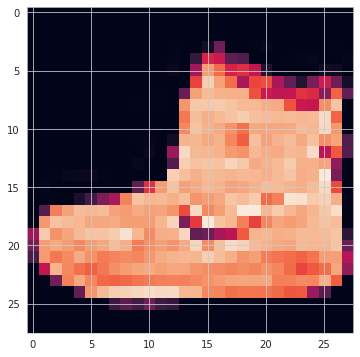

In [8]:
plt.imshow(X_train[0])
# Burada pseudo color nedeniyle sanki renkli imiş gibi görünüyor ancak gray scale bir resim.

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_train[0]

9

In [11]:
classes[9]

'Ankle boot'

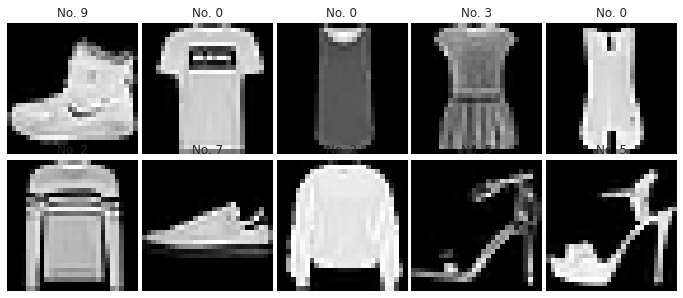

In [12]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
X_train.min()

0

In [14]:
X_train.max()

255

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.min()

0.0

In [17]:
X_train.max()

1.0

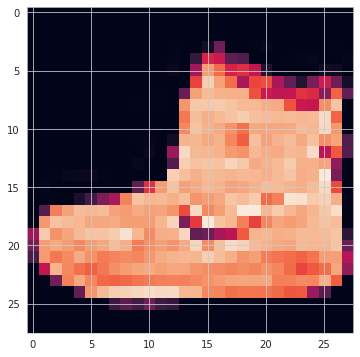

In [18]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[8]

5

In [28]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
# Pool_size kaça kaç ise stride da default olarak o değer gelir. ancak burada değiştirerek (1,1) yaptık.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
# Softmax, toplamları 1 olacak şekilde her bir kategoriye prediction olasılık değeri ataması yapar.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 256)               4480256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [32]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.4055 - accuracy: 0.8607 - val_loss: 0.3096 - val_accuracy: 0.8933
Epoch 2/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2994 - accuracy: 0.8972 - val_loss: 0.3270 - val_accuracy: 0.8943
Epoch 3/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.2841 - accuracy: 0.9024 - val_loss: 0.3251 - val_accuracy: 0.8952
Epoch 4/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2797 - accuracy: 0.9051 - val_loss: 0.3018 - val_accuracy: 0.8981
Epoch 5/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2750 - accuracy: 0.9059 - val_loss: 0.3036 - val_accuracy: 0.9010
Epoch 6/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.2755 - accuracy: 0.9073 - val_loss: 0.3350 - val_accuracy: 0.8996
Epoch 7/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2748 - accuracy: 0.9077 - val_loss: 0

**TASK 7: Plot values of metrics you used in your model.**

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.405,0.861,0.310,0.893
1,0.299,0.897,0.327,0.894
2,0.284,0.902,0.325,0.895
3,0.280,0.905,0.302,0.898
4,0.275,0.906,0.304,0.901


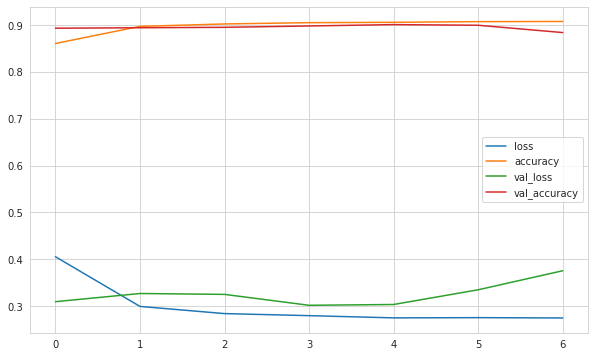

In [38]:
summary.plot();

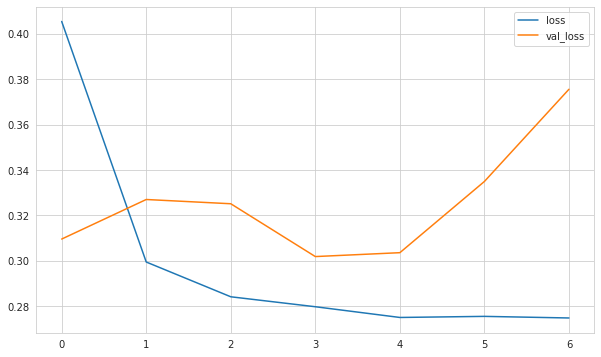

In [39]:
summary[["loss", "val_loss"]].plot();

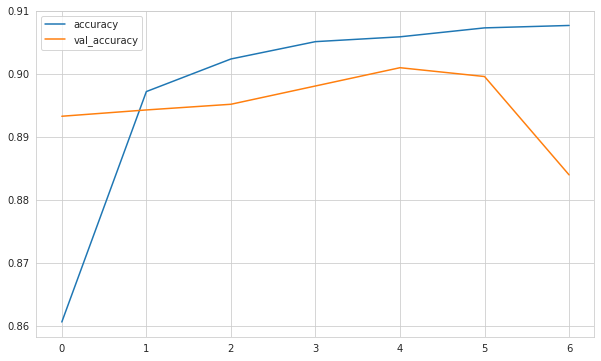

In [40]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3018 - accuracy: 0.8981


[0.301846981048584, 0.8981000185012817]

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.301846981048584
Test accuracy: 0.8981000185012817


In [44]:
pred_prob = model.predict(X_test)
pred_prob

array([[7.5433562e-08, 7.8943613e-10, 1.4855925e-07, ..., 8.2698338e-05,
        6.0714189e-07, 9.9987543e-01],
       [3.0630858e-07, 4.1763160e-19, 9.9999964e-01, ..., 6.6686477e-14,
        1.1963432e-11, 1.4842435e-14],
       [1.1418728e-05, 9.9997222e-01, 3.3083086e-07, ..., 3.0654082e-08,
        4.4510539e-06, 6.8036556e-08],
       ...,
       [5.1897459e-06, 4.2466539e-16, 4.7518753e-08, ..., 6.7850003e-11,
        9.9995732e-01, 7.7811181e-11],
       [1.9534599e-07, 9.9996328e-01, 1.9250434e-08, ..., 2.6011915e-09,
        8.6150806e-08, 2.7681313e-08],
       [5.5051907e-03, 6.0096208e-05, 2.5566526e-02, ..., 1.2734300e-01,
        1.7755760e-02, 7.5899893e-03]], dtype=float32)

In [45]:
pred_prob.shape

(10000, 10)

In [46]:
pred_prob[0]

array([7.5433562e-08, 7.8943613e-10, 1.4855925e-07, 3.2751064e-09,
       1.0517367e-08, 4.0837531e-05, 1.8724798e-07, 8.2698338e-05,
       6.0714189e-07, 9.9987543e-01], dtype=float32)

In [47]:
np.argmax(pred_prob[0])

9

In [48]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [49]:
y_pred.shape

(10000,)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.86      0.84      1000
           3       0.90      0.89      0.89      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.98      0.97      1000
           6       0.75      0.67      0.71      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [51]:
print(confusion_matrix(y_test, y_pred))

[[883   0  21  17   6   2  66   0   5   0]
 [  7 963   0  20   2   0   6   0   2   0]
 [ 21   0 865   7  61   0  46   0   0   0]
 [ 22   4  12 892  29   0  38   0   3   0]
 [  2   0  84  25 828   0  60   0   1   0]
 [  0   0   0   1   0 981   0  10   0   8]
 [134   0  86  30  64   0 672   0  14   0]
 [  0   0   0   0   0  20   0 951   0  29]
 [  1   1   1   3   4   3   6   3 978   0]
 [  0   0   0   0   0   7   0  24   1 968]]


In [52]:
(y_test != y_pred).sum()

1019

## Prediction

In [53]:
samples=[X_test[0], X_test[1], X_test[2]]

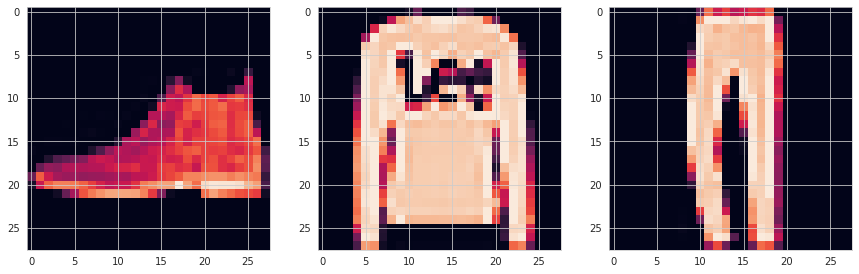

In [54]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [55]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [56]:
samples.shape

(3, 28, 28, 1)

In [57]:
pred_prob = model.predict(samples)
pred_prob

array([[7.54332703e-08, 7.89430132e-10, 1.48559536e-07, 3.27509397e-09,
        1.05173878e-08, 4.08376873e-05, 1.87249043e-07, 8.26986507e-05,
        6.07144784e-07, 9.99875426e-01],
       [3.06307982e-07, 4.17631601e-19, 9.99999642e-01, 2.83512866e-11,
        1.96077394e-08, 6.23831499e-13, 4.34801848e-08, 6.66859688e-14,
        1.19634545e-11, 1.48425482e-14],
       [1.14187378e-05, 9.99972224e-01, 3.30831824e-07, 8.44686565e-06,
        1.41615556e-06, 6.27241036e-07, 1.00296904e-06, 3.06541388e-08,
        4.45105798e-06, 6.80368188e-08]], dtype=float32)

In [58]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1])

In [59]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [60]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [61]:
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser
